<a href="https://colab.research.google.com/github/joaochenriques/MCTE_2020_2021/blob/main/PumpingProblem/Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as mpl
%config InlineBackend.figure_formats = ['svg']

In [2]:
Wp, ηp, ρ, g, S, Δ = sp.symbols( "W_p, η_p, ρ, g, S, Δ" ) 
Wp = ρ*g*S*Δ**2 / ηp / 2
Wp

S*g*Δ**2*ρ/(2*η_p)

In [3]:
Wt, ηt, R = sp.symbols( "W_t, η_t, R" ) 
Wt = sp.expand(ρ*g*S*(R+Δ)**2 * ηt) / 2
Wt

R**2*S*g*η_t*ρ/2 + R*S*g*Δ*η_t*ρ + S*g*Δ**2*η_t*ρ/2

In [4]:
Wt0 = ρ*g*S*R**2/2 * ηt
Wt0

R**2*S*g*η_t*ρ/2

In [5]:
G = sp.simplify(sp.cancel((Wt-Wp)/Wt0))
G

1 + 2*Δ/R + Δ**2/R**2 - Δ**2/(R**2*η_p*η_t)

In [6]:
η = sp.symbols( "η" ) 

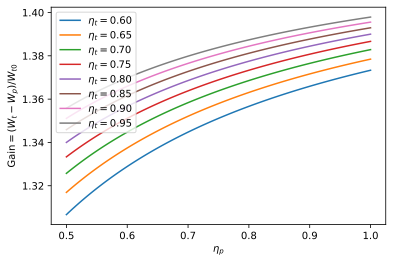

In [7]:
ηt_vals = np.linspace(0.6, 0.95, 8)

for eta_t in ηt_vals: 
  Gcase = G.subs( ηt, eta_t ).subs( R, 5 ).subs( Δ, 1 )
  lam_g = sp.lambdify( ηp, Gcase )

  ηp_vals = np.linspace(0.5, 1.0, 100)
  g_vals = lam_g(ηp_vals)

  mpl.plot(ηp_vals, g_vals, label = ("$\eta_t=%.2f$" % eta_t) )

mpl.legend(loc="upper left")
mpl.xlabel("$η_p$")
mpl.ylabel("$\mathrm{Gain}=(W_t-W_p)/W_{t0}$");